In [20]:
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter("ignore")

def euler_method(a,x0,delta):
    t =[delta*x for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t[:-1]:
        y.append(y[-1]+a(tn,y[-1])*delta)
    return [t,y]


## PC-Exercise 8.1.1
  Apply the Euler method (1.2) to the VIP $\frac{dx}{dt} = -5x , x(0) = 1$, with $\delta = 2^{-3} ,2^{-5}$ over $0 \le t \le 1$

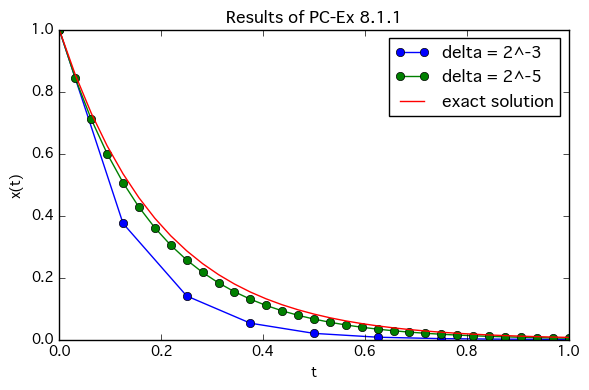

In [21]:
def a811(t,x):
    return -5*x

plt.title("Results of PC-Ex 8.1.1")
plt.xlabel("t")
plt.ylabel("x(t)")

ans1 = euler_method(a811,1.0,2**(-3))
ans2 = euler_method(a811,1.0,2**(-5))

exact_x = [x*(2**(-5)) for x in range(2**5 + 1)]
exact_y = [math.exp(-5*x) for x in exact_x]

plt.plot(ans1[0],ans1[1],"-o",label="delta = 2^-3")
plt.plot(ans2[0],ans2[1],"-o",label="delta = 2^-5")
plt.plot(exact_x,exact_y ,label = "exact solution")
plt.tight_layout(False)
plt.legend()
plt.show()
plt.close()

## PC-Exercise 8.1.2
For the IVP in PC-Exercise 8.1.2 calculate the global discretization error at time = 1 for the Euler method with time steps of equal length $\Delta = 1,2^{-1},2^{-2},\cdots,2^{-13}$,rounding off to $5$ singnificant digits.Plot the logarithm to the base 2 of these error against $\log_2 \Delta$ and determine the slope of the resulting curve.

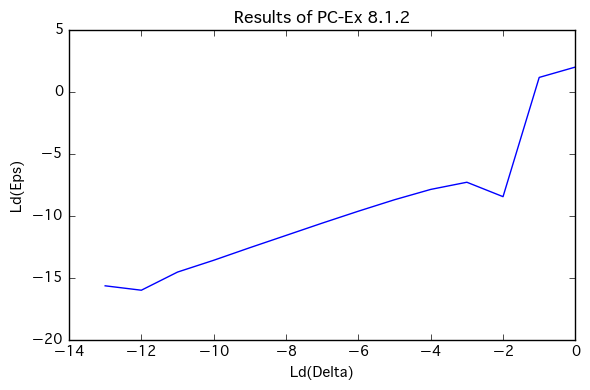

In [22]:
def roundoff(x,i=5):
    return float(format(x,'.' + str(i) + 'g'))

def euler_method_round(a,x0,delta):
    t =[roundoff(delta*x) for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t[:-1]:
        y.append(roundoff(y[-1]+a(tn,y[-1])*delta))
    return [t,y]


plt.title("Results of PC-Ex 8.1.2")
plt.xlabel("Ld(Delta)")
plt.ylabel("Ld(Eps)")
x=[i for i in range(0,-14,-1)]

from math import fabs,exp,log 
error = lambda i : fabs(exp(-5*euler_method_round(a811,1.0,2**i)[0][-1])
                        - euler_method_round(a811,1.0,2**i)[1][-1])
y=[log(roundoff(error(i)),2) for i in range(0,-14,-1)]
plt.plot(x,y)
plt.show()    
plt.close()
